In [1]:
import pandas as pd

papers_path = r"C:\Users\realj\Desktop\Projects\whut-final\backend\var\ai-edu-500.xlsx"

In [2]:
df = pd.read_excel(papers_path)

df.head()


,title,src,db,cite,down
0,ChatGPT助推学校教育数字化转型——人工智能时代学什么与怎么教,中国远程教育,期刊,110.0,26321
1,生成式人工智能的教育应用与展望——以ChatGPT系统为例,中国远程教育,期刊,143.0,22327
2,“阿拉丁神灯”还是“潘多拉魔盒”：ChatGPT教育应用的潜能与风险,现代远程教育研究,期刊,133.0,19793
3,教育数字化转型：转什么，怎么转,华东师范大学学报(教育科学版),期刊,166.0,16165
4,教育元宇宙应用于中学地理教学的路径探析,地理教学,期刊,NaN,14591


In [5]:
import requests

def get_score(text: str):
    data: dict = requests.get(f"http://localhost:8002/eval/scores?text={text}").json()
    # data: {
    #  "novelty_score": 0,
    #  "academic_score": 0,
    #  "application_score": 0,
    #  "trend_score": 0,
    #  "match_score": 0
    # }
    data["avg"] = sum(data.values())/len(data)
    return data


In [6]:
get_score("社会热点需求驱动的大学生创新创业模式探索")

{'novelty_score': 89.33861102298923,
 'academic_score': 92.14580535888672,
 'application_score': 91.29816174507141,
 'trend_score': 85.22826666666667,
 'match_score': 92.10078535999997,
 'avg': 90.0223260307228}

In [7]:
# 定义一个包装函数以便应用到 DataFrame
def apply_get_score(row):
    scores = get_score(row['title'])
    for key, value in scores.items():
        row[key] = value
    return row

# 对每一行应用包装函数并将结果存储在原 DataFrame 中
df = df.apply(apply_get_score, axis=1)


In [10]:
s_df = df.sort_values(by="avg")

In [11]:
s_df.head(10)

,title,src,db,cite,down,novelty_score,academic_score,application_score,trend_score,match_score,avg
317,教育战“疫”之中国经验研究——在线教育视角,中国远程教育,期刊,6.0,1608,90.280303,89.809786,87.479846,68.750000,89.173120,85.098611
225,高校思政课混合式教学优化路径探析,学校党建与思想教育,期刊,4.0,1987,85.446754,87.965028,86.486881,80.416667,89.535174,85.970101
425,“双减”背景下如何实现中小学智慧作业的“减量增效”?,现代教育技术,期刊,4.0,1265,88.236403,87.426494,86.702089,85.228267,84.389879,86.396626
326,人工智能时代“马克思主义基本原理”课教学中的四个关键问题,思想理论教育导刊,期刊,2.0,1589,89.028539,89.086430,86.612200,80.000000,87.731234,86.491681
242,2022中国教育评价改革热点研究,教育学术月刊,期刊,5.0,1894,85.103491,89.340423,89.664696,75.833333,92.922517,86.572892
140,人机协同教研会促进教师教学反思能力的发展吗?——基于课堂视频智能分析技术的实证研究,现代远距离教育,期刊,10.0,2662,91.019827,89.189826,87.512689,78.333333,87.233473,86.657830
126,大概念统摄下的“AI+小学科学”跨学科教学——以“探寻四季更替的奥秘”为例,现代教育技术,期刊,3.0,2815,82.559456,91.103153,86.727880,86.824733,88.054770,87.053999
493,《中国考试》2024年重点选题,中国考试,期刊,NaN,1131,85.298814,90.481602,89.709752,81.250000,89.552350,87.258504
261,智能环境下角色扮演的游戏化教学何以有效？——基于认知具身观点的理论透视,电化教育研究,期刊,3.0,1820,86.863293,90.330939,87.287735,85.000200,87.072812,87.310996
245,线上线下融合教育的理论框架、发展路径及未来图景——基于文献综述的视角,成人教育,期刊,NaN,1885,90.215273,91.327595,87.484317,77.916667,90.400885,87.468947


In [12]:
s_df.tail(10)

,title,src,db,cite,down,novelty_score,academic_score,application_score,trend_score,match_score,avg
248,数字文明变局中的教育数字化转型,电化教育研究,期刊,17.0,1873,92.784560,90.890377,89.982836,97.087733,92.617160,92.672533
24,人工智能通用大模型教育应用影响探析,开放教育研究,期刊,62.0,7693,92.145223,91.037815,92.132418,98.000000,90.235183,92.710128
19,ChatGPT类产品：内在机制及其对学习评价的影响,中国远程教育,期刊,71.0,8931,92.530363,91.802638,91.764640,98.000000,89.717766,92.763081
113,ChatGPT赋能学习何以可能,电化教育研究,期刊,4.0,3055,98.000000,89.947461,90.288626,98.000000,87.602847,92.767787
161,ChatGPT应用背景下教育发展的逻辑转换及实践路径,重庆理工大学学报(社会科学),期刊,9.0,2475,93.930365,91.341310,90.571402,98.000000,90.073762,92.783368
90,科技赋能教育高质量发展:价值内涵、表征样态与推进策略,中国电化教育,期刊,31.0,3485,93.062558,92.947237,90.863811,97.771933,89.765930,92.882294
364,ChatGPT道德感与高教德育的技术限度问题,中国电化教育,期刊,1.0,1441,92.769011,91.916184,90.425001,98.000000,92.512568,93.124553
265,数字化教育技术的能动性、价值治理及教育性物化,教育研究,期刊,1.0,1814,92.975878,93.780314,92.877882,95.491267,91.148220,93.254712
468,智情双驱:数字人的教育价值与应用研究,远程教育杂志,期刊,4.0,1176,92.105448,92.810117,93.120115,97.771933,90.986103,93.358743
38,高意识生成式学习：AIGC技术赋能的学习范式创新,电化教育研究,期刊,29.0,5408,95.440363,93.768816,91.679882,98.000000,90.869802,93.951773


<Axes: xlabel='cite', ylabel='avg'>

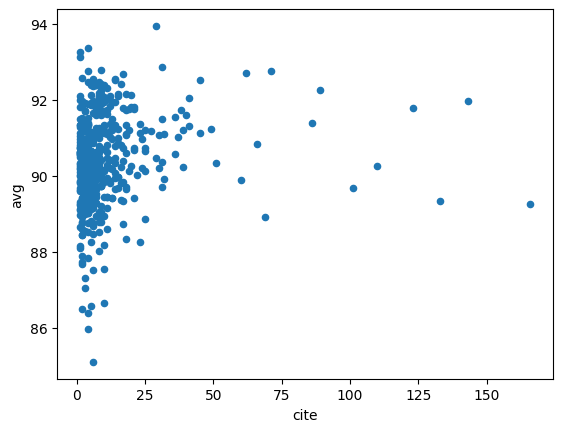

In [19]:
s_df.plot(kind="scatter", x="cite", y="avg")

In [18]:
down_df = df.sort_values(by="down")
down_df.head()

,title,src,db,cite,down,novelty_score,academic_score,application_score,trend_score,match_score,avg
499,当代前沿科技方法融入《自然辩证法概论》课程的若干理路,自然辩证法研究,期刊,NaN,1123,86.482739,90.674334,88.041477,87.280867,89.231602,88.342204
498,敏捷治理：教育人工智能伦理治理新模式,电化教育研究,期刊,4.0,1126,90.344563,91.182541,89.595686,90.473800,90.294889,90.378296
497,数智赋能“大思政课”教学云探索,中学政治教学参考,期刊,4.0,1126,89.415041,91.717719,92.017936,86.824733,90.093405,90.013767
496,优化法学学科体系 创新发展法学理论研究体系,西南政法大学学报,期刊,7.0,1127,89.957584,91.143792,88.406436,82.083333,93.155550,88.949339
495,重新思考人工智能给教育带来的冲击和影响——人工智能与未来教育国际前沿研究专栏导读,中国教育信息化,期刊,5.0,1128,89.283462,90.300553,87.348776,94.807067,86.729241,89.693820


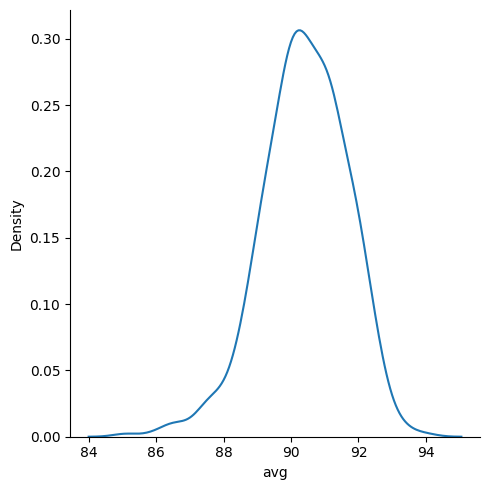

In [23]:
import seaborn as sns

sns.displot(data=df, x="avg", kind="kde")

In [24]:
df.describe()

,cite,down,novelty_score,academic_score,application_score,trend_score,match_score,avg
count,436.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,11.594037,2742.760000,89.849780,91.053184,89.331498,91.790324,89.965027,90.397963
std,18.458599,2708.371961,2.450232,1.237631,1.393676,5.393886,1.715003,1.268215
min,1.000000,1123.000000,79.259877,87.426143,85.753988,68.750000,84.046368,85.098611
25%,3.000000,1409.750000,88.307863,90.212389,88.358125,87.965067,88.816788,89.658508
50%,7.000000,1866.500000,90.107494,91.102933,89.426931,92.298333,89.903768,90.432712
75%,12.000000,2865.250000,91.530874,91.839074,90.187508,98.000000,91.159362,91.288163
max,166.000000,26321.000000,98.000000,94.627463,93.577628,98.000000,95.897300,93.951773
